In [1]:
import datetime
time_start = datetime.datetime.now()
print('start time:',time_start)

start time: 2022-03-14 15:38:22.475368


In [2]:
scClass_path = !cd ..;pwd
scClass_path = str(scClass_path.n)
import sys; sys.path.append(scClass_path)
import scClass

In [3]:
import scanpy as sc
import numpy as np
import pandas as pd

In [4]:
filename_training = "../../dataset/PBMC_CITE.h5ad"

In [5]:
adata = sc.read_h5ad(filename_training)
adata

AnnData object with n_obs × n_vars = 161764 × 20729
    obs: 'Phase', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'donor', 'lane', 'nCount_ADT', 'nCount_RNA', 'nCount_SCT', 'nFeature_ADT', 'nFeature_RNA', 'nFeature_SCT', 'orig.ident', 'time', 'modelA id', 'modelC id', 'transfer cell type', 'origin cell type'
    var: 'Gene'

In [6]:
adata = scClass.pp.preprocess(adata,filter=True,random=False,normalize=False)

filter type_id=-1 cell:  161764  -> 154238  cells


In [7]:
adata.write_h5ad("../../dataset/PBMC_CITE_modelC.h5ad")

In [8]:
adata = scClass.pp.preprocess(adata,filter=False,random=False,normalize=True)

normalizing data


In [9]:
dataset = scClass.npz_dataloader(matrix=adata.X,label=adata.obs['modelC id'])

loading data, it will take time


In [10]:
model = scClass.Model()

In [11]:
scClass.training(dataset,model)

0 10 20 
epoch 0 	| loss:0.29503956 | training accuracy:0.93700000| loss:0.26006839 | validation accuracy:0.93483969
0 10 20 
epoch 1 	| loss:0.11157962 | training accuracy:0.96800000| loss:0.11386587 | validation accuracy:0.97062923
0 10 20 
epoch 2 	| loss:0.10751680 | training accuracy:0.97900000| loss:0.09070028 | validation accuracy:0.97675625
0 10 20 
epoch 3 	| loss:0.06245515 | training accuracy:0.98000000| loss:0.07679720 | validation accuracy:0.97970629
0 10 20 
epoch 4 	| loss:0.06301367 | training accuracy:0.98100000| loss:0.07366914 | validation accuracy:0.97977113
0 10 20 
epoch 5 	| loss:0.08218098 | training accuracy:0.97200000| loss:0.07010732 | validation accuracy:0.98022498
0 10 20 
epoch 6 	| loss:0.04268966 | training accuracy:0.98900000| loss:0.05542125 | validation accuracy:0.98430966
0 10 20 
epoch 7 	| loss:0.04716616 | training accuracy:0.98800000| loss:0.06681985 | validation accuracy:0.97870133
0 10 20 
epoch 8 	| loss:0.03863327 | training accuracy:0.986000

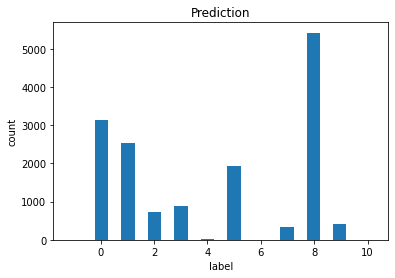

In [12]:
y_pred = scClass.predict(dataset.test_x,model)

total acc: 97.78901640407184 %


,label
-1,unknown
0,T-helper cell
1,cytotoxic T cell
2,memory B cell
3,naive B cell
4,plasma cell
5,natural killer cell
6,erythrocyte
7,megakaryocyte
8,monocyte

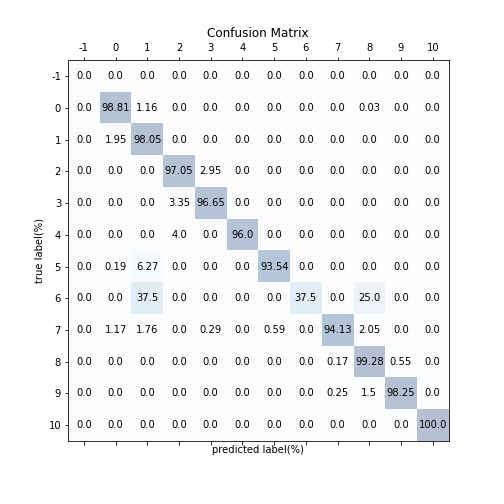

In [13]:
fig = scClass.confusion_matrix(y_pred,dataset.test_y)
scClass.figure_html(fig)

In [18]:
scClass.plot_performance(y_pred=y_pred,y_true=np.array(dataset.test_y))

,Performance,Value
0,accuary,0.977890
1,precision,0.917515
2,recall,0.976419
3,f1-score,0.933770


In [14]:
model.save("../scClass/data/model_all.pkl")

In [15]:
time_end = datetime.datetime.now()
print('-------------Time Record---------------')
print('start time:',time_start)
print('  end time:',time_end)
print('---------Run time----------')
delta = time_end-time_start
print(delta.seconds//60,'min,',delta.seconds%60,'sec')

-------------Time Record---------------
start time: 2022-03-14 15:38:22.475368
  end time: 2022-03-14 15:42:20.147301
---------Run time----------
3 min, 57 sec
